In [169]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import plot_confusion_matrix , classification_report
from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt
from yellowbrick.model_selection import LearningCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion


In [2]:
data = pd.read_csv('datadf.csv')
data

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,0,2017,0,3,34,1,0,0,0
1,1,0,2013,2,1,28,0,0,3,1
2,2,0,2014,1,3,38,0,0,2,0
3,3,1,2016,0,3,27,1,0,5,1
4,4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
4648,4648,0,2013,0,3,26,0,0,4,0
4649,4649,1,2013,2,2,37,1,0,2,1
4650,4650,1,2018,1,3,27,1,0,5,1
4651,4651,0,2012,0,3,30,1,1,2,0


In [3]:
data.drop(['Unnamed: 0'], axis=1)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [4]:
X = data.drop(["LeaveOrNot"], axis=1)
y = data.LeaveOrNot

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [6]:
X_train.shape

(3722, 9)

In [7]:
y_train.shape

(3722,)

# Preprocessing_StandardScaler

In [8]:
preprocessing_StandardScaler = Pipeline(steps=[
    ("standardscaler", StandardScaler())])

In [9]:
# preprocessing_Min_Max_Scaler = Pipeline(steps=[
#     ("standardscaler", MinMaxScaler())])

# 1er Iteration-BaseLine-SMOTE_DummyClassifier

In [10]:
# automatise le SMOTE
Dummy_smote = SMOTE( sampling_strategy='auto')

In [11]:
DummyPipeline = imbpipeline(steps=[["smote" , Dummy_smote],
                               ["classifier", DummyClassifier()]])

In [12]:
# fit sur le X et y train
DummyPipeline.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE()), ['classifier', DummyClassifier()]])

In [13]:
print("accuracy train : %.3f"%DummyPipeline.score(X_train , y_train))
print("accuracy test : %.3f"%DummyPipeline.score(X_test , y_test))

accuracy train : 0.656
accuracy test : 0.655


In [14]:
y_pred_DummyPipeline = DummyPipeline.predict(X_test) 

In [15]:
print(classification_report(y_test, y_pred_DummyPipeline))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       610
           1       0.00      0.00      0.00       321

    accuracy                           0.66       931
   macro avg       0.33      0.50      0.40       931
weighted avg       0.43      0.66      0.52       931



C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


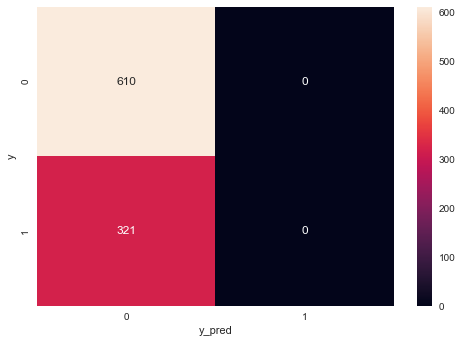

In [16]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_DummyPipeline)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

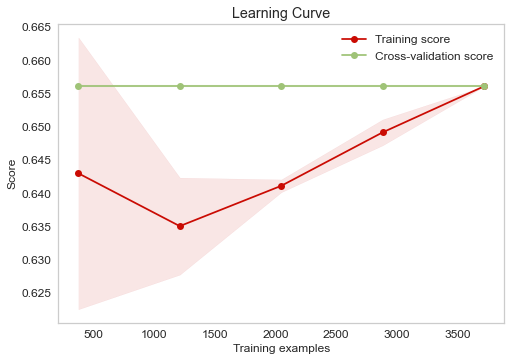

In [17]:
plot_learning_curve(DummyPipeline, X, y)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

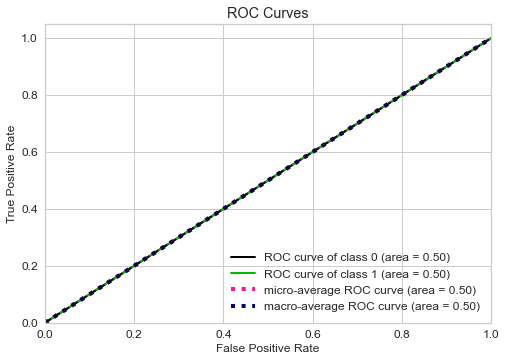

In [145]:
DummyPipeline.fit(X_train, y_train)
y_probas = DummyPipeline.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 2eme Iteration LogisiticRegression

In [146]:
LogicReg = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                            ["classifier", LogisticRegression()]])

In [147]:
LogicReg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ['classifier', LogisticRegression()]])

In [148]:
print("accuracy train : %.3f"%LogicReg.score(X_train , y_train))
print("accuracy test : %.3f"%LogicReg.score(X_test , y_test))

accuracy train : 0.708
accuracy test : 0.711


In [149]:
y_pred_LogicReg = LogicReg.predict(X_test) 

In [150]:
print(classification_report(y_test, y_pred_LogicReg))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       610
           1       0.63      0.39      0.48       321

    accuracy                           0.71       931
   macro avg       0.68      0.64      0.64       931
weighted avg       0.70      0.71      0.69       931



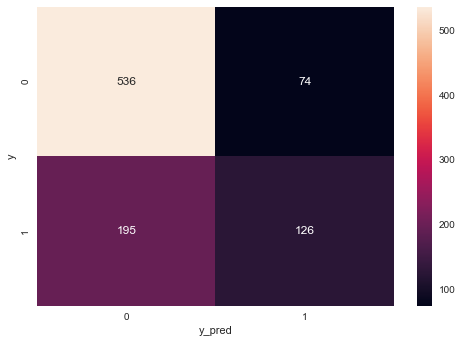

In [151]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_LogicReg)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

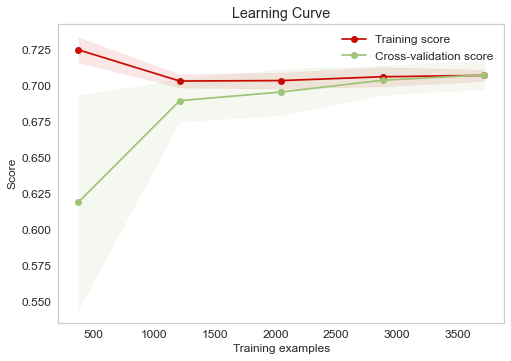

In [152]:
plot_learning_curve(LogicReg, X, y)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

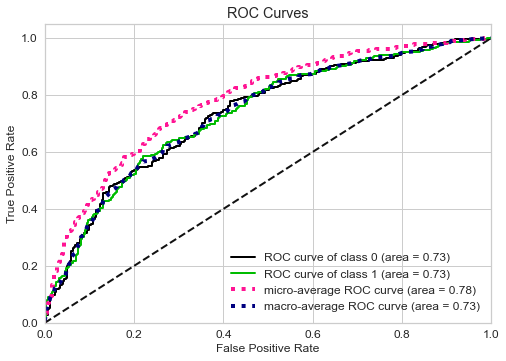

In [153]:
LogicReg.fit(X_train, y_train)
y_probas = LogicReg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 3eme Iteration KNeighborsClassifier

In [154]:
KNC = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                     ["classifier", KNeighborsClassifier()]])

In [155]:
KNC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [156]:
print("accuracy train : %.3f"%KNC.score(X_train , y_train))
print("accuracy test : %.3f"%KNC.score(X_test , y_test))

accuracy train : 0.858
accuracy test : 0.824


In [157]:
y_pred_KNC = KNC.predict(X_test) 

In [158]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       610
           1       0.83      0.61      0.71       321

    accuracy                           0.82       931
   macro avg       0.83      0.77      0.79       931
weighted avg       0.83      0.82      0.82       931



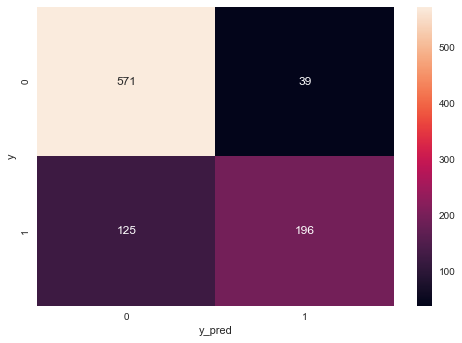

In [159]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

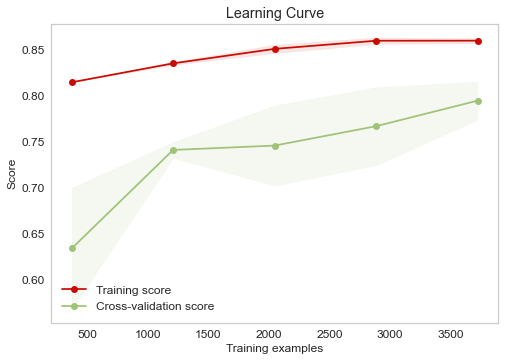

In [160]:
plot_learning_curve(KNC, X, y)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

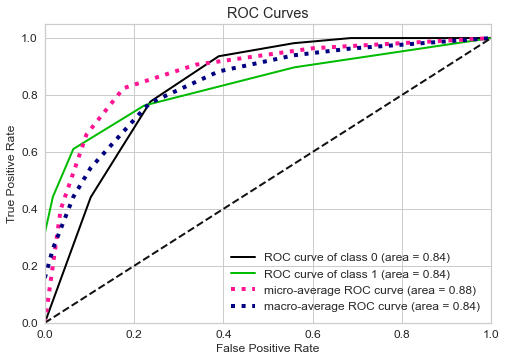

In [161]:
KNC.fit(X_train, y_train)
y_probas = KNC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 4eme Iteration- DecisionTree

In [162]:
DeT = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                     ["classifier", DecisionTreeClassifier()]])

In [163]:
DeT.fit(X_train, y_train)

Pipeline(steps=[('standardscaler',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ['classifier', DecisionTreeClassifier()]])

In [164]:
print("accuracy train : %.3f"%DeT.score(X_train , y_train))
print("accuracy test : %.3f"%DeT.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.783


In [165]:
y_pred_DeT = DeT.predict(X_test) 

In [166]:
print(classification_report(y_test, y_pred_DeT))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       610
           1       0.67      0.73      0.70       321

    accuracy                           0.78       931
   macro avg       0.76      0.77      0.76       931
weighted avg       0.79      0.78      0.79       931



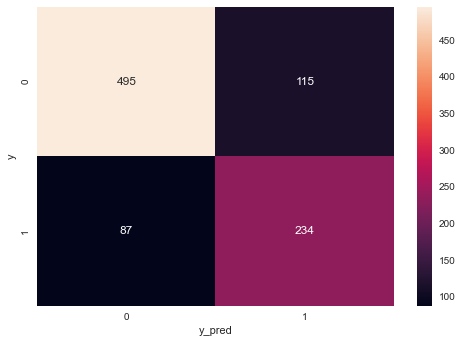

In [167]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_DeT)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

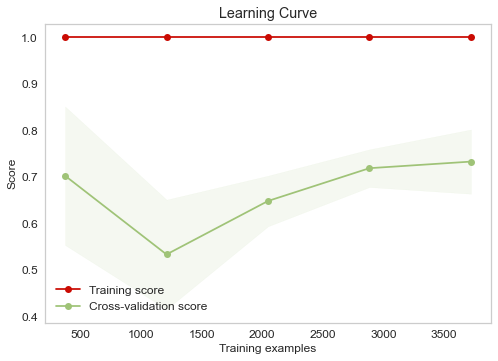

In [168]:
plot_learning_curve(DeT, X, y)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

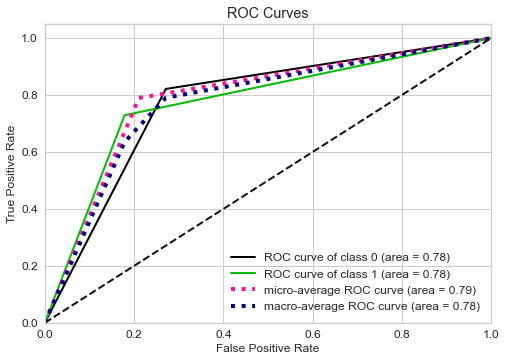

In [169]:
DeT.fit(X_train, y_train)
y_probas = DeT.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 5eme Iteration-Bagging(RandomForestClassifier)

In [170]:
RFC = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                        ["classifier", RandomForestClassifier()]])
#  ["min_max_scaler", preprocessing_Min_Max_Scaler],

In [171]:
RFC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ['classifier', RandomForestClassifier()]])

In [172]:
print("accuracy train : %.3f"%RFC.score(X_train , y_train))
print("accuracy test : %.3f"%RFC.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.846


In [173]:
y_pred_RFC = RFC.predict(X_test) 

In [174]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       610
           1       0.82      0.70      0.76       321

    accuracy                           0.85       931
   macro avg       0.84      0.81      0.82       931
weighted avg       0.84      0.85      0.84       931



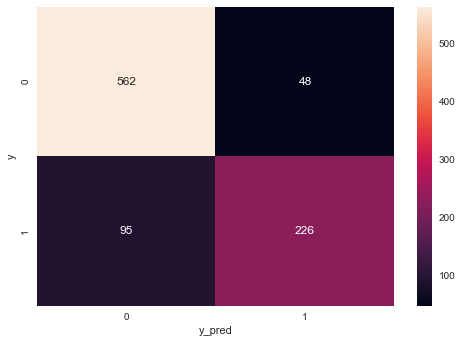

In [175]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_RFC)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

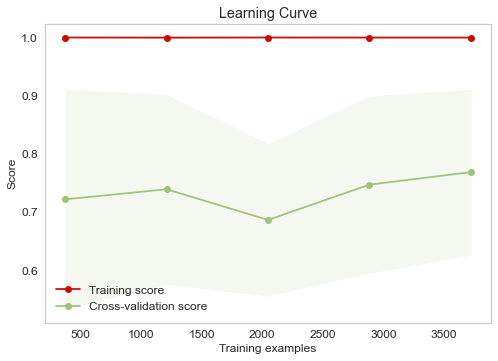

In [176]:
plot_learning_curve(RFC, X, y)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

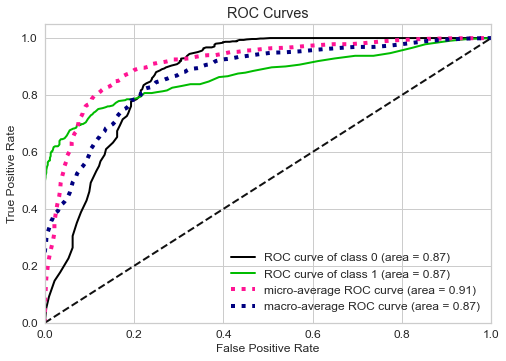

In [177]:
RFC.fit(X_train, y_train)
y_probas = RFC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 6eme Iteration-Boosting(GradientBoostingClassifier)

In [178]:
GBC = Pipeline(steps=[["standardscaler" , preprocessing_StandardScaler],
                            ["classifier", GradientBoostingClassifier()]])

In [179]:
GBC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ['classifier', GradientBoostingClassifier()]])

In [180]:
print("accuracy train : %.3f"%GBC.score(X_train , y_train))
print("accuracy test : %.3f"%GBC.score(X_test , y_test))

accuracy train : 0.852
accuracy test : 0.853


In [181]:
y_pred_GBC = GBC.predict(X_test) 

In [182]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       610
           1       0.89      0.66      0.75       321

    accuracy                           0.85       931
   macro avg       0.86      0.81      0.82       931
weighted avg       0.86      0.85      0.85       931



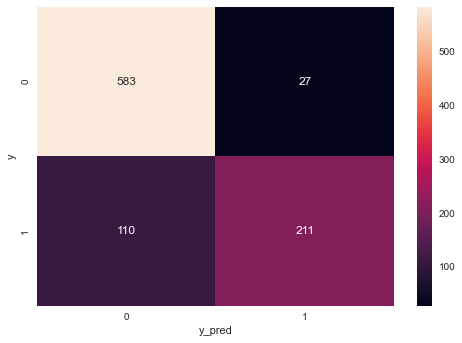

In [183]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_GBC)

# Learning-Curve

In [ ]:
plot_learning_curve(GBC, X, y)

# ROC-AUC

In [ ]:
GBC.fit(X_train, y_train)
y_probas = GBC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# STACKING

In [ ]:
ML_stacking = StackingClassifier([
                                    ("KN" , KNC)])
ML_stacking.fit(X_test , y_test)
y_pred_stack = ML_stacking.predict(X_test)

In [ ]:
svc_grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=svc_params,
                           scoring='accuracy',
                           cv=crossval, verbose=1,
                           n_jobs=-1)